In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data about countries and continent
ctr = pd.read_csv (r'C:\Users\DUONG\Desktop\project\population\countries.csv')
print (ctr)

      id                     name      continent
0    171              Afghanistan           Asia
1     51                  Albania         Europe
2    115                  Algeria         Africa
3    172           American Samoa        Oceania
4    116                   Angola         Africa
..   ...                      ...            ...
209   50  Virgin Islands, British  North America
210  168           Western Sahara         Africa
211  114                    Yemen           Asia
212  169                   Zambia         Africa
213  170                 Zimbabwe         Africa

[214 rows x 3 columns]


In [3]:
#Ask the details of ctr
print(ctr.dtypes)

id            int64
name         object
continent    object
dtype: object


In [4]:
#Read the data about population from 2000 to 2010
plt = pd.read_csv (r'C:\Users\DUONG\Desktop\project\population\population_years.csv')
print (plt)

        id  population  year  country_id
0        1     0.06306  2000           1
1       12    31.09956  2000           2
2       23     0.05689  2000           3
3       34    99.92662  2000           4
4       45     0.00641  2000           5
...    ...         ...   ...         ...
2338  2299     1.15463  2010         210
2339  2310     0.12258  2010         211
2340  2321     0.24221  2010         212
2341  2332     0.22155  2010         213
2342  2343    89.57113  2010         214

[2343 rows x 4 columns]


In [5]:
#Ask the details of plt
print(plt.dtypes)

id              int64
population    float64
year            int64
country_id      int64
dtype: object


In [6]:
#Question no.1: How many entries in the countries table are from Asia?

In [7]:
#Use for - if to do the calculation
Asian_ctr = sum(1 for i in ctr['continent'] if i == 'Asia')
print(Asian_ctr)

51


In [8]:
#Question no.2: What was the total population of the continent of Asia over years?

In [9]:
#Get all the country with the continent of Asia
Asia_ct = ctr[ctr['continent']=='Asia']
print(Asia_ct)

      id                      name continent
0    171               Afghanistan      Asia
7     86                   Armenia      Asia
11    87                Azerbaijan      Asia
13   101                   Bahrain      Asia
14   174                Bangladesh      Asia
21   175                    Bhutan      Asia
26   176                    Brunei      Asia
29   177           Burma (Myanmar)      Asia
31   178                  Cambodia      Asia
39   179                     China      Asia
49    57                    Cyprus      Asia
72    90                   Georgia      Asia
87   184                 Hong Kong      Asia
90   185                     India      Asia
91   186                 Indonesia      Asia
92   102                      Iran      Asia
93   103                      Iraq      Asia
95   104                    Israel      Asia
98   187                     Japan      Asia
99   105                    Jordan      Asia
100   91                Kazakhstan      Asia
103  189  

In [10]:
#Sum up the population of the country with id in the list as above
Asia_pop = plt[plt['country_id'].isin(Asia_ct['id'])]
Asia_Total = Asia_pop['population'].sum(skipna=True)
print(Asia_Total)

43060.62809


In [11]:
#Question no.3: What was the average population of the continent of Asia in 2008?

In [12]:
#Get the population of Asian countries in 2008
Asia_2008 = Asia_pop[Asia_pop['year']==2008]
print(Asia_2008)

        id  population  year  country_id
1759   614     1.06682  2008          57
1786   911    75.79384  2008          84
1788   933     2.96859  2008          86
1789   944     8.17772  2008          87
1792   977     4.63084  2008          90
1793   988    15.34053  2008          91
1794   999     5.35687  2008          92
1799  1054     7.21188  2008          97
1800  1065     4.82933  2008          98
1802  1087    27.34503  2008         100
1803  1098     0.71917  2008         101
1804  1109    75.02536  2008         102
1805  1120    28.22144  2008         103
1806  1131     7.11236  2008         104
1807  1142     6.13263  2008         105
1808  1153     2.59806  2008         106
1809  1164     4.03802  2008         107
1810  1175     2.85388  2008         108
1811  1186     3.90788  2008         109
1812  1197     0.82479  2008         110
1813  1208    24.91741  2008         111
1814  1219    21.32486  2008         112
1815  1230     4.62140  2008         113
1816  1241    22

In [13]:
Asian_sum08 = Asia_2008['population'].sum()
Asian_count08 = Asia_2008['population'].count() 
print(Asian_sum08/Asian_count08)                                                    #Average=Sum/Count

79.36306431372547


In [14]:
#Question no.4: Compare the total population of Asia with other continents

In [15]:
#Create a new dataframe that have population and continent information
merged_plt = pd.merge(left=plt, right=ctr, left_on='country_id', right_on='id')
cont = merged_plt.loc[:, ['population','continent']]
print(cont)

      population      continent
0        0.06306  North America
1        0.06361  North America
2        0.06418  North America
3        0.06476  North America
4        0.06534  North America
...          ...            ...
2338    85.47054           Asia
2339    86.51885           Asia
2340    87.55836           Asia
2341    88.57676           Asia
2342    89.57113           Asia

[2343 rows x 2 columns]


In [16]:
#Group the total population by continent
bycont = cont.groupby('continent')
print(bycont.sum())

                population
continent                 
Africa          9972.25333
Asia           43060.62809
Europe          7991.48186
North America   5643.75671
Oceania          359.47808
South America   4096.11401


array([<AxesSubplot:ylabel='population'>], dtype=object)

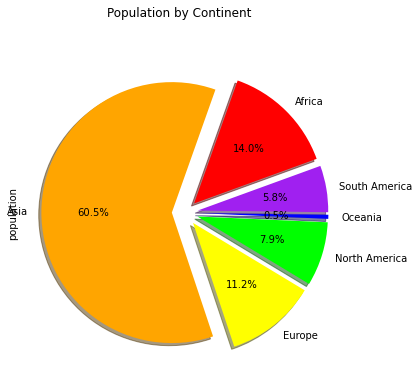

In [17]:
#Draw a pie chart to show the comparison
chart01=bycont.sum()
chart01.plot.pie(subplots=True, title = "Population by Continent", figsize =(6,6), legend = False,
                 colors = ('#FF0000','#FFA500','#FFFF00','#00FF00','#0000FF','#A020F0'),autopct='%1.1f%%',
                 explode =(0.1, 0.1, 0.1, 0.1, 0.1, 0.1), shadow = True, startangle = 20, counterclock = True)

In [18]:
#Question no.5: Compare the number of countries of Asia with other continents

In [19]:
#Get only data about countries and continents
set_ctr = ctr.loc[:, ['continent', 'name']]
print(set_ctr)

         continent                     name
0             Asia              Afghanistan
1           Europe                  Albania
2           Africa                  Algeria
3          Oceania           American Samoa
4           Africa                   Angola
..             ...                      ...
209  North America  Virgin Islands, British
210         Africa           Western Sahara
211           Asia                    Yemen
212         Africa                   Zambia
213         Africa                 Zimbabwe

[214 rows x 2 columns]


In [20]:
#Count the number of countries in each continent
count_ctr = set_ctr.groupby(['continent'])['continent'].count()
print(count_ctr)

continent
Africa           56
Asia             51
Europe           40
North America    36
Oceania          17
South America    14
Name: continent, dtype: int64


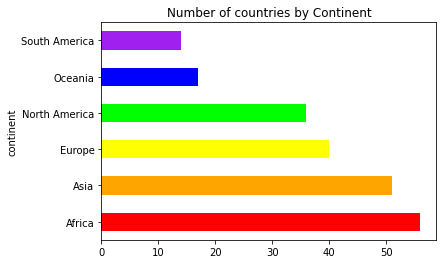

In [21]:
#Draw a bar chart to show the comparison
ctr_count = count_ctr.plot.barh(title = "Number of countries by Continent", legend = False, 
                                color = ['#FF0000','#FFA500','#FFFF00','#00FF00','#0000FF','#A020F0'])

In [22]:
#Question no.6: Add the population data from 2011 to 2020

In [23]:
#Read the data about population from 2011 to 2020
addctr = pd.read_excel (r'Desktop\additional.xls')
print (addctr)

             name  population  year
0     Afghanistan    3.011741  2011
1     Afghanistan    3.116138  2012
2     Afghanistan    3.226959  2013
3     Afghanistan    3.337080  2014
4     Afghanistan    3.441360  2015
...           ...         ...   ...
1965     Zimbabwe    1.403034  2016
1966     Zimbabwe    1.423660  2017
1967     Zimbabwe    1.443881  2018
1968     Zimbabwe    1.464547  2019
1969     Zimbabwe    1.486293  2020

[1970 rows x 3 columns]


In [24]:
#Merge the data about countries and population with each other
merged_plt1 = pd.merge(left=ctr, right=addctr, left_on='name', right_on='name')
merged_plt2 = merged_plt1.loc[:, ['name', 'continent', 'population', 'year']]
print(merged_plt2)

             name continent  population  year
0     Afghanistan      Asia    3.011741  2011
1     Afghanistan      Asia    3.116138  2012
2     Afghanistan      Asia    3.226959  2013
3     Afghanistan      Asia    3.337080  2014
4     Afghanistan      Asia    3.441360  2015
...           ...       ...         ...   ...
1935     Zimbabwe    Africa    1.403034  2016
1936     Zimbabwe    Africa    1.423660  2017
1937     Zimbabwe    Africa    1.443881  2018
1938     Zimbabwe    Africa    1.464547  2019
1939     Zimbabwe    Africa    1.486293  2020

[1940 rows x 4 columns]


In [25]:
#Change the shape of merged_plt so that it is similar to merged_plt
merged_plt3 = merged_plt.loc[:, ['name', 'continent', 'population', 'year']]
print(merged_plt3)

         name      continent  population  year
0     Bermuda  North America     0.06306  2000
1     Bermuda  North America     0.06361  2001
2     Bermuda  North America     0.06418  2002
3     Bermuda  North America     0.06476  2003
4     Bermuda  North America     0.06534  2004
...       ...            ...         ...   ...
2338  Vietnam           Asia    85.47054  2006
2339  Vietnam           Asia    86.51885  2007
2340  Vietnam           Asia    87.55836  2008
2341  Vietnam           Asia    88.57676  2009
2342  Vietnam           Asia    89.57113  2010

[2343 rows x 4 columns]


In [26]:
#Combine 2 dataframe together
pop0020 = merged_plt3.append(merged_plt2, ignore_index=True)
print(pop0020)

          name      continent  population  year
0      Bermuda  North America    0.063060  2000
1      Bermuda  North America    0.063610  2001
2      Bermuda  North America    0.064180  2002
3      Bermuda  North America    0.064760  2003
4      Bermuda  North America    0.065340  2004
...        ...            ...         ...   ...
4278  Zimbabwe         Africa    1.403034  2016
4279  Zimbabwe         Africa    1.423660  2017
4280  Zimbabwe         Africa    1.443881  2018
4281  Zimbabwe         Africa    1.464547  2019
4282  Zimbabwe         Africa    1.486293  2020

[4283 rows x 4 columns]


In [27]:
#Question no.7: Present the change in population proportion of continents, in 00-10, 10-20 and in the whole period

In [28]:
#Recall the total population of each continent from 2000 to 2010
total0010 = chart01
print(total0010)

                population
continent                 
Africa          9972.25333
Asia           43060.62809
Europe          7991.48186
North America   5643.75671
Oceania          359.47808
South America   4096.11401


In [29]:
#Get the total population of each continent from 2010 to 2020
draft0 = merged_plt2.loc[:, ['population','continent']]
draft1 = draft0.groupby('continent')
total1020=draft1.sum()
print(total1020)

                population
continent                 
Africa         1183.583831
Asia           4370.047483
Europe          586.205906
North America   568.673922
Oceania          39.856530
South America   413.816478


In [30]:
#Get the total population of each continent in the whole period
draft2 = pop0020.loc[:, ['population','continent']]
draft3 = draft2.groupby('continent')
total0020=draft3.sum()
print(total0020)

                 population
continent                  
Africa         11155.837161
Asia           47430.675573
Europe          8577.687766
North America   6212.430632
Oceania          399.334610
South America   4509.930488


In [31]:
#Combine the data of 3 periods in one dataframe
merged = pd.merge(left=total0010, right=total1020, left_on='continent', right_on='continent')
mergedd = pd.merge(left=merged, right=total0020, left_on='continent', right_on='continent')
mergedd = mergedd.rename(columns = {'population_x':'00_10', 'population_y':'10_20', 'population':'00_20'})
merged000 = mergedd.T
print(merged000)

continent        Africa          Asia       Europe  North America    Oceania  \
00_10       9972.253330  43060.628090  7991.481860    5643.756710  359.47808   
10_20       1183.583831   4370.047483   586.205906     568.673922   39.85653   
00_20      11155.837161  47430.675573  8577.687766    6212.430632  399.33461   

continent  South America  
00_10        4096.114010  
10_20         413.816478  
00_20        4509.930488  


<AxesSubplot:title={'center':'Proportion change through years'}>

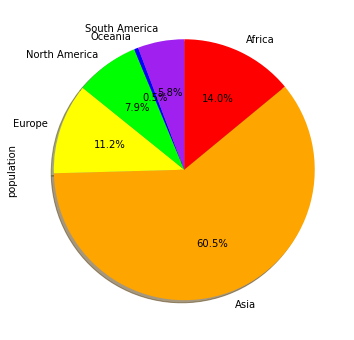

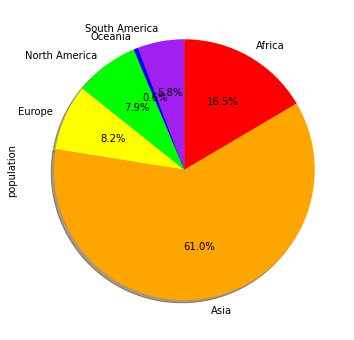

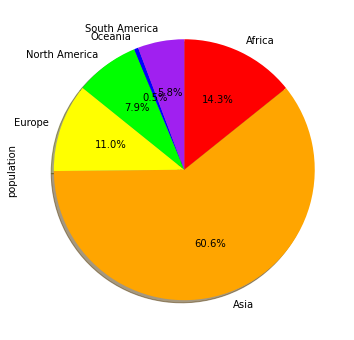

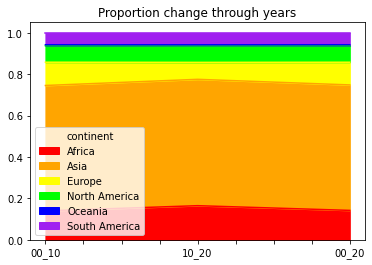

In [32]:
#Draw charts
total0010.plot.pie(subplots=True, figsize =(6,6), colors = ('#FF0000','#FFA500','#FFFF00','#00FF00','#0000FF','#A020F0'),
                   legend = False, autopct='%1.1f%%', shadow = True, startangle = 90, counterclock = False)
total1020.plot.pie(subplots=True, figsize =(6,6), colors = ('#FF0000','#FFA500','#FFFF00','#00FF00','#0000FF','#A020F0'),
                   legend = False, autopct='%1.1f%%', shadow = True, startangle = 90, counterclock = False)
total0020.plot.pie(subplots=True, figsize =(6,6), colors = ('#FF0000','#FFA500','#FFFF00','#00FF00','#0000FF','#A020F0'),
                   legend = False, autopct='%1.1f%%', shadow = True, startangle = 90, counterclock = False)
merged000 = merged000.div(merged000.sum(1), axis=0)
merged000.plot.area(title = "Proportion change through years",
                    color = ('#FF0000','#FFA500','#FFFF00','#00FF00','#0000FF','#A020F0'))